<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/Colabs/nb07_Ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> (Última Actualización: 8 de Octubre de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

El modelado continuo es la práctica matemática de modelar variables continuas (aquellas que son infinitamente divisibles, en contraste con las variables discretas). Estas variables pueden representar distintos sistemas físicos, donde un sistema es un conjunto de objetos con alguna interacción o interdependencia. Por otro lado, un modelo es una representación conceptual de un objeto o proceso determinado que captura algún conjunto de aspectos de ese objeto o proceso. Es una descripción simplificada e idealizada de la fenomenología del comportamiento de un sistema, por lo general expresada en lenguaje matemático. El modelado consiste entonces en vincular el mundo real con el mundo matemático.

* Mundo real
  * Sistemas físicos
  * Comportamineto observado
* Mundo matemático
  * Modelos
  * Operaciones y reglas

Cuando uno modela está interesado en comprender cómo funciona un sistema en particular, qué características provocan cambios en el sistema y cuán sensible es el sistema a ciertos cambios. También está interesado en predecir qué cambios podrían ocurrir y cuándo ocurrirán. Cabe destacar, que los sistemas físicos pueden ser muy complicados, con niveles de complejidad que pueden resultar difíciles de describir matemáticamente. El problema puede ser tan grande que sea imposible capturar toda la información en un solo modelo matemático. Al hacer observaciones sobre el comportamiento del mundo real, normalmente no podremos identificar o considerar todos los factores asociados con el fenómeno. Por lo tanto, haríamos suposiciones simplificadoras que eliminarían algunos de los factores.

El objetivo del modelado matemático es producir una aproximación que sea suficiente para describir las partes importantes del sistema. Esto significa que el dominio de aplicabilidad de un modelo puede ser limitado en comparación con la representación matemática conceptualmente perfecta de dicho sistema. En particular, las observaciones que uno puede hacer sobre un sistema, se representan con datos definidos como variables discretas al ser imposible medir absolutamente todo. Es decir, los datos son una representaión inherentemente subsampleada de las variables del sistema. En contraste, los modelos proponen relaciones entre variables continuas. Esto hace que la incapacidad de conocer de manera completa un sistema lleve a que la construcción de conocimiento del mundo real se realice de manera inductiva. No hay que perder la perspectiva de que las conclusiones que obtengamos de este modelo se refieren estrictamente al modelo y no al comportamiento en el mundo real, ya que hemos realizado simplificaciones en el modelo y las observaciones en las que hemos basado nuestro modelo podrían contener errores. No obstante, el uso de modelos en ciertas condiciones puede ser muy informativo del sistema o inclusive ser la base sobre la cual se formulan hipótesis de mecanismos subyacentes que permitan construir teorías lo suficientemente generales.

> “How can it be that mathematics, being after all a product of human thought independent of experience, is so admirably adapted to the objects of reality?” - Albert Einstein (1879-1955)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import pandas as pd
# from mpl_toolkits.mplot3d import axes3d

# Ajuste de datos

En modelado data-driven buscamos representar la relación entre variables a partir de datos observados. El ajuste consiste en encontrar una función o modelo que reproduzca, con cierto criterio, el comportamiento de esos datos.

# Regresión

La regresión busca ajustar un modelo a datos que pueden contener ruido o incertidumbre. El objetivo no es pasar exactamente por todos los puntos, sino capturar la tendencia general o la ley subyacente. Ejemplo: ajuste lineal o polinómico con mínimos cuadrados.

**Mínimos cuadrados**

Busca los parámetros del modelo que minimizan la suma de los errores cuadráticos entre los datos y las predicciones.
Es el método clásico de ajuste en regresión lineal y base de muchos algoritmos más generales.

**Máxima verosimilitud**

Determina los parámetros que maximizan la probabilidad de observar los datos dados el modelo.
Generaliza el enfoque de mínimos cuadrados al considerar la distribución estadística del ruido.

**Descenso por el gradiente**

Método iterativo para minimizar una función de costo.
Actualiza los parámetros en la dirección opuesta al gradiente hasta alcanzar un mínimo.
Es la base del entrenamiento en modelos no lineales y redes neuronales.

### Ejemplo: datos de población

Tomemos el archivo de datos de población mundial (descargado de la página del [Banco Mundial](https://data.worldbank.org/indicator/SP.POP.TOTL?downloadformat=csv)), y la cargamos como un DataFrame.



In [4]:
import requests
import zipfile
import io

# url_pop = "https://data.worldbank.org/indicator/SP.POP.TOTL?downloadformat=csv"
url_pop = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?downloadformat=csv"
r = requests.get(url_pop)
r.raise_for_status()

# El contenido es un ZIP
z = zipfile.ZipFile(io.BytesIO(r.content))
# Listar archivos dentro
# print(z.namelist())

# Supongamos que uno de los archivos es “API_SP.POP.TOTL_DS2_en_csv_v2_xxx.csv”
# Buscamos el archivo CSV dentro del ZIP:
csv_filename = [name for name in z.namelist() if (name.endswith(".csv")) and (name.startswith("API"))][0]

# Leer el CSV directamente desde el ZIP en un DataFrame
df_pop = pd.read_csv(z.open(csv_filename), skiprows=4)  # las 4 primeras filas son metadata
df_pop


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1777568.0,1791019.0,1797086.0,1788891.0,1790151.0,1786079.0,1768096.0,1682668.0,1527324.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,40583164.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,64007187.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,21314956.0,NaN


Vemos que desde la 4ta columna tenemos los años, y que la última columna está de más

In [5]:
df_pop.iloc[:,-1]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
261   NaN
262   NaN
263   NaN
264   NaN
265   NaN
Name: Unnamed: 69, Length: 266, dtype: float64

In [6]:
df_pop.drop(df_pop.columns[-1], axis=1, inplace=True)

In [7]:
df_pop.keys()[4:]

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

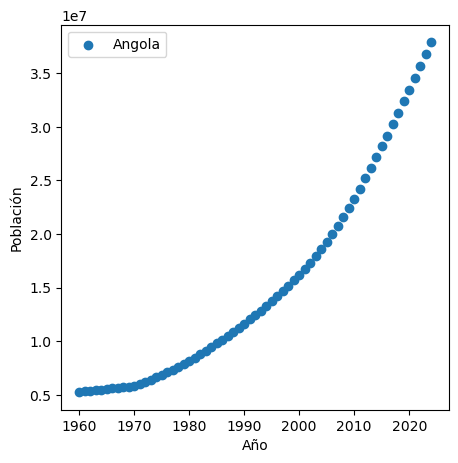

In [8]:
# Podemos, por ejemplo, extraer los datos para algún país, pasarlos a un vector y graficarlos:
pais = "Angola"
df_pais = df_pop[df_pop['Country Name'] == pais]
pop_pais = df_pais.iloc[0, 4:].values
años = np.array(df_pop.keys()[4:].astype('float'))

plt.figure(figsize=(5,5))
plt.scatter(años, pop_pais, label=pais)
plt.xticks(años[::10], rotation=0)
plt.xlabel("Año")
plt.ylabel("Población")
plt.legend()
plt.show()

Para algunos ejemplos podemos usar un modelo exponencial. Pero es importante pensar en el rango de validez de este modelo, considerando que la población no puede crecer exponencialmente de manera ilimitada sin toparse con una saturación debido a la finitud de recursos. Pero es una aproximación válida localmente en ciertas circunstancia como por ejemeplo al inicio del crecimiento de uno población, o en casos que empíricamente tienen este comportamiento por factores que exceden el análisis de este ejercicio.

Pero bajo ciertos supuestos podemos especular con que podemos ajustar con un modelo $N(t) = a e^{b(t-t_0)}$, donde $a$ es la población inicial (por ejemplo, en el primer año del dataset), y $b$ es la tasa de crecimiento anual (en unidades 1/año). Es importante destacar que de $b$, se puede estimar un *tiempo de duplicación poblacional*, a partir de la expresión $T_d = \frac{\ln 2}{b}$, que es una métrica muy útil para comparar el crecimiento entre países o períodos.

Para hacer una regresión con un modelo no lineal (o lineal generalizado, con una función de activación no lineal, que es lo mismo), podemos usar el método Levenberg-Marquardt. Este método es básicamente el descenso por el gradiente, pero con unas mejoras computacionales que cuando tengo pocos parámetros mejoran la convergencia. Si tengo muchos parámetros, como con redes neuronales, se usa descenso por el gradiente de manera estándar. En python, podemos usar el método Levenberg–Marquardt con `scipy.optimize.curve_fit` o con el paquete `lmfit`, que es más versátil.


[[Model]]
    Model(exp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 65
    # variables        = 2
    chi-square         = 8.0059e+12
    reduced chi-square = 1.2708e+11
    Akaike info crit   = 1663.89248
    Bayesian info crit = 1668.24125
    R-squared          = 0.99865795
[[Variables]]
    a:  4106058.07 +/- 41544.8716 (1.01%) (init = 1000000)
    b:  0.03481715 +/- 1.9313e-04 (0.55%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9705
a = 4.106e+06,  b = 0.0348


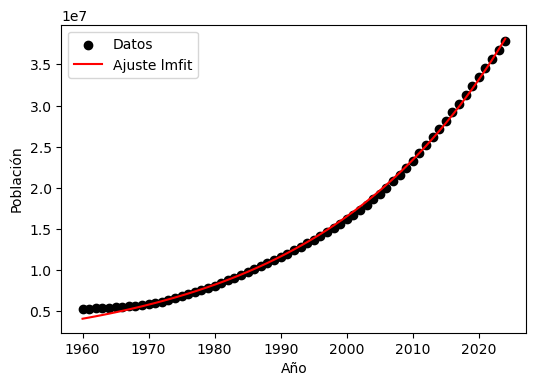

In [9]:
# # # Con lmfit
import lmfit

# Definir modelo exponencial
def exp_model(t, a, b):
    return a * np.exp(b * (t - t.min()))

# Crear modelo a partir de la función
model = lmfit.Model(exp_model)

# Parámetros iniciales (opcional, pero ayuda a la convergencia)
params = model.make_params(a=1e6, b=0.02)
params["a"].min = 0  # forzar positividad

# Ajuste
result = model.fit(pop_pais, params, t=años)

# Mostrar resumen
print(result.fit_report())

# Parámetros finales
a_fit = result.params["a"].value
b_fit = result.params["b"].value
print(f"a = {a_fit:.3e},  b = {b_fit:.4f}")

# Predicción y visualización
plt.figure(figsize=(6,4))
plt.scatter(años, pop_pais, label="Datos", color="k")
plt.plot(años, result.best_fit, "r", label="Ajuste lmfit")
plt.xticks(años[::10])
plt.xlabel("Año")
plt.ylabel("Población")
plt.legend()
plt.show()


a = 4.106e+06, b = 0.0348


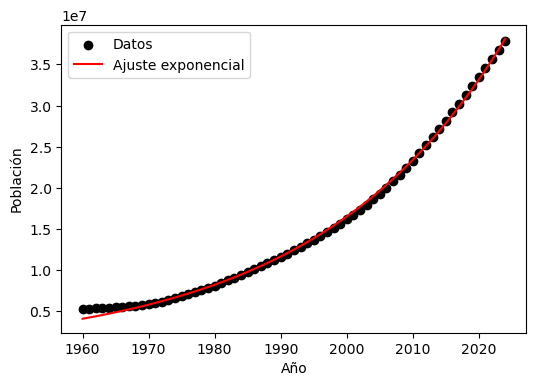

In [10]:
# # # con curve_fit de scipy
from scipy.optimize import curve_fit

# Definir modelo exponencial
def exp_model(t, a, b):
    return a * np.exp(b * (t - t.min()))

# Ajuste
popt, _ = curve_fit(exp_model, años, pop_pais, p0=[1e6, 0.02])
a, b = popt
print(f"a = {a:.3e}, b = {b:.4f}")

# Graficar
plt.figure(figsize=(6,4))
plt.scatter(años, pop_pais, label="Datos", color="k")
plt.plot(años, exp_model(años, a, b), 'r', label="Ajuste exponencial")
plt.xticks(años[::10])
plt.xlabel("Año")
plt.ylabel("Población")
plt.legend()
plt.show()


**Observación**: También podríamos haber aplicado el logaritmo al modelo para transformarlo a un problema lineal.

Algo interesante es que para la parte anterior, definimos explícitamente la forma del modelo, la dependencia funcional. Esto implica que conocemos/proponemos la solución. Pero en muchos sistemas dinámicos, no es fácil estimar una buena solución de manera analítica. Pero eso no es problema, porque lo que podemos hacer es resolver el problema de optimización pero para la solución numérica que se obtendría de integrar la ODE, directamente, sin la necesidad de conocer la expresión explícita de la solución.

[[Model]]
    Model(exp_ode_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 65
    # variables        = 2
    chi-square         = 7.9792e+12
    reduced chi-square = 1.2665e+11
    Akaike info crit   = 1663.67569
    Bayesian info crit = 1668.02446
    R-squared          = 0.99866242
[[Variables]]
    a:  4106427.13 +/- 41474.5799 (1.01%) (init = 1000000)
    b:  0.03481581 +/- 1.9277e-04 (0.55%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9705
a = 4.106e+06, b = 0.0348


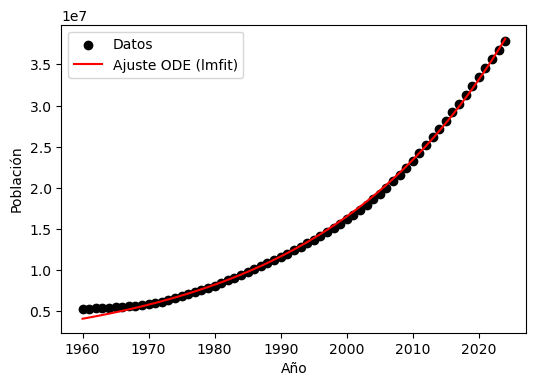

In [11]:
# Definir el sistema dinámico: dP/dt = b * P
def dP_dt(t, P, b):
    return b * P

# Definir el modelo que integra la ODE y devuelve P(t)
def exp_ode_model(t, a, b):
    # integrar desde t0 hasta tn
    sol = sp.integrate.solve_ivp(
        dP_dt,
        (t.min(), t.max()),
        [a],  # condición inicial
        t_eval=t,
        args=(b,)
    )
    return sol.y[0]

# Crear modelo lmfit
model = lmfit.Model(exp_ode_model)

# Parámetros iniciales
params = model.make_params(a=1e6, b=0.02)
params["a"].min = 0
params["b"].min = 0

# Ajuste
result = model.fit(pop_pais, params, t=años)

# Reporte
print(result.fit_report())

# Extraer parámetros ajustados
a_fit = result.params["a"].value
b_fit = result.params["b"].value
print(f"a = {a_fit:.3e}, b = {b_fit:.4f}")

# Visualización
plt.figure(figsize=(6,4))
plt.scatter(años, pop_pais, label="Datos", color="k")
plt.plot(años, result.best_fit, "r", label="Ajuste ODE (lmfit)")
plt.xticks(años[::10])
plt.xlabel("Año")
plt.ylabel("Población")
plt.legend()
plt.show()


# Datos de un video

Vamos a estudiar un video de oscilaciones amortiguadas y a extraer las variables. Para esto vamos a pelearnos con
pelearnos con trackear objetos en video

Otras opciones de interés podrían ser:
* resorte vertical amortiguado fluido
https://www.youtube.com/watch?v=sP1DzhT8Vzo

* damped harmonic oscillators (resorte, pendulo, circuito, amortiguadores automovil)
https://www.youtube.com/watch?v=ASqqp0a8LqI


In [12]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)


4.12.0


In [13]:
from pytube import YouTube
import yt_dlp
import ffmpeg

Nos quedamos con un segmento. De 0:23 a 0:45 es oscilador amortiguado

Descargamos solo el clip de video que nos interesa

In [14]:
url = "https://www.youtube.com/watch?v=99ZE2RGwqSM"

# Definimos el segmento que queremos (en segundos)
start_time = 26   # inicio
end_time = 45     # fin
duration = end_time - start_time

ydl_opts = {
    'format': 'bestvideo+bestaudio/best',
    'outtmpl': 'pendulo_clip.mp4',
    'download_sections': [f'*{start_time}-{end_time}'],
    'postprocessor_args': [
        '-ss', str(start_time),
        '-t', str(duration)
    ],
    'merge_output_format': 'mp4',
    'quiet': False
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

print("Segmento del video descargado correctamente.")


[youtube] Extracting URL: https://www.youtube.com/watch?v=99ZE2RGwqSM
[youtube] 99ZE2RGwqSM: Downloading webpage
[youtube] 99ZE2RGwqSM: Downloading tv client config
[youtube] 99ZE2RGwqSM: Downloading tv player API JSON
[youtube] 99ZE2RGwqSM: Downloading web safari player API JSON
[youtube] 99ZE2RGwqSM: Downloading m3u8 information
[info] 99ZE2RGwqSM: Downloading 1 format(s): 247+251
[download] pendulo_clip.mp4 has already been downloaded
Segmento del video descargado correctamente.


In [15]:
from IPython.display import Video
Video("pendulo_clip.mp4", embed=True, width=600)

Ahora vamos a extraer los frames del clip

Trackeamos el objeto

In [16]:
import numpy as np

def get_diff_center(diff: np.ndarray) -> tuple:
    """
    Calcula el centro de masa de una imagen usando operaciones vectorizadas de NumPy.
    """
    # Suma total de los pesos (intensidad de los píxeles)
    total_mass = diff.sum()

    # Si la suma es cero (imagen negra), el centro de masa es indefinido.
    # Devolvemos (0, 0) para evitar una división por cero.
    if total_mass == 0:
        return 0.0, 0.0

    # Se crean los rangos de índices para las filas (i) y columnas (j)
    rows = np.arange(diff.shape[0])
    cols = np.arange(diff.shape[1])

    # Se calcula la suma ponderada de los índices
    # Para las filas (coordenada y), necesitamos un vector columna para el broadcasting
    sum_i = (diff * rows[:, np.newaxis]).sum()
    # Para las columnas (coordenada x), el broadcasting funciona directamente
    sum_j = (diff * cols).sum()

    # Se divide por la suma total para obtener el centroide
    return sum_i / total_mass, sum_j / total_mass


cap = cv2.VideoCapture('pendulo_clip.mp4')
ret, frame = cap.read()
if not ret:
    raise RuntimeError("No se pudo leer el primer frame.")

gray_prev = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
center_coords = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray_next = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray_prev, gray_next)
    center_coords.append(get_diff_center(diff))

    if len(center_coords) % 100 == 0:
        print(f"{len(center_coords)} frames procesados.")
        # plt.imshow(diff)
        # plt.plot(center_coords[-1][1], center_coords[-1][0], 'r+')
        # plt.show()
    gray_prev = gray_next

positions = np.array(center_coords)
np.save("pendulo_positions.npy", positions)
print(f"{len(positions)} posiciones registradas.")


100 frames procesados.
200 frames procesados.
300 frames procesados.
400 frames procesados.
449 posiciones registradas.


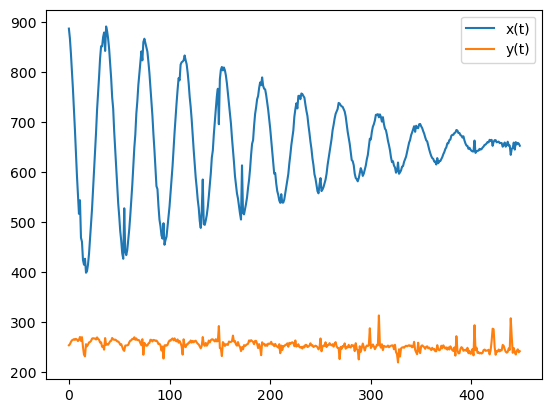

In [17]:
positions = np.load("pendulo_positions.npy")
x, y = positions[:,1], positions[:,0]

plt.plot(x, label="x(t)")
plt.plot(y, label="y(t)")
plt.legend()
plt.show()


## Ejercicio 1

Usando la variable extraída del video, realicen el ajuste pertinente para considerar que se trata de un oscilador amortiguado.

(Las variables que les proponemos son una posible solución de extracción, pero si quieren pueden pelearse con técnicas de trackeado de objetos en videos)

A = -2.874e+02, lambda = 0.0049, omega = 0.1614, phi = -1.1102, b = 654.2287


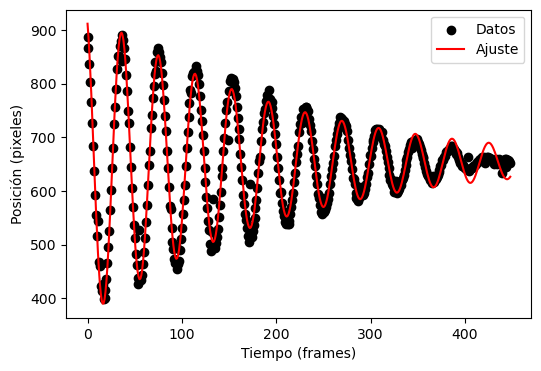

In [18]:
from scipy.optimize import curve_fit

def exp_model(t, A, lamb, omega, phi, b):
    return A * np.exp(-lamb * t) * np.sin(omega * t + phi) + b

tiempos = np.arange(len(x))
popt, _ = curve_fit(exp_model, tiempos, x, p0 = [np.ptp(x)/2, 0.01, 0.1, 0, np.mean(x)]) # 
A, lamb, omega, phi, b = popt
print(f"A = {A:.3e}, lambda = {lamb:.4f}, omega = {omega:.4f}, phi = {phi:.4f}, b = {b:.4f}")

plt.figure(figsize=(6,4))
plt.scatter(tiempos, x, label="Datos", color="k")
plt.plot(exp_model(tiempos, A, lamb, omega, phi, b), 'r', label="Ajuste")
plt.xlabel("Tiempo (frames)")
plt.ylabel("Posición (pixeles)")
plt.legend()
plt.show()

# Regresión por ventanas

## Filtro de Savitzky–Golay

Ajusta localmente polinomios por mínimos cuadrados dentro de una ventana deslizante.
Suaviza la señal y permite calcular derivadas de manera robusta frente al ruido.
Realiza un ajuste local que preserva la forma de la señal.
Frecuentemente usado en análisis experimental y procesamiento de señales.

Se puede usar para el cálculo de derivadas. Para esto, se ajusta un polinomio de orden bajo en una ventana deslizante y se calcula la derivada del polinomio en el centro. En una ventana de ($2k+1$) puntos alrededor de ($t_i$), se ajusta $f(t) \approx a_0 + a_1 t + a_2 t^2 + \dots + a_n t^n$. La derivada es simplemente ($a_1$), evaluada en el centro de la ventana.

Esto suaviza y deriva en un solo paso; es mucho más robusto al ruido que los métodos de diferencias finitas; puede presentar limitaciones para algunos problemas porque no se adapta bien a bordes ni a cambios rápidos en la dinámica si la ventana es muy grande.

### Ejemplo

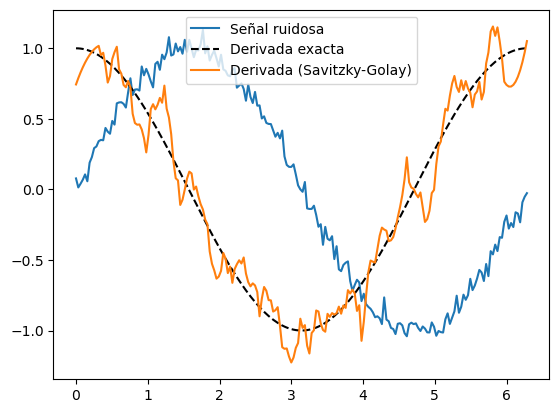

In [19]:
from scipy.signal import savgol_filter

def derivada_savgol(y, dt=1.0, window_length=11, polyorder=3):
    """
    Calcula la derivada primera de una señal usando el filtro de Savitzky-Golay.

    Parámetros
    ----------
    y : array_like
        Serie temporal (valores de la función).
    dt : float
        Paso temporal entre puntos (default=1.0).
    window_length : int
        Tamaño de la ventana (impar, p.ej. 5, 7, 11).
    polyorder : int
        Orden del polinomio usado en el ajuste local.

    Retorna
    -------
    dy : ndarray
        Estimación de la derivada de y.
    """
    dy = savgol_filter(y, window_length=window_length,
                          polyorder=polyorder,
                          deriv=1, delta=dt)
    return dy

# Ejemplo de uso
t = np.linspace(0, 2*np.pi, 200)
y = np.sin(t) + 0.05*np.random.randn(len(t))  # señal ruidosa
dy = derivada_savgol(y, dt=t[1]-t[0], window_length=21, polyorder=3)

plt.plot(t, y, label="Señal ruidosa")
plt.plot(t, np.cos(t), 'k--', label="Derivada exacta")
plt.plot(t, dy, label="Derivada (Savitzky-Golay)")
plt.legend()
plt.show()

## Ejercicio 2

Viendo esta aplicación de Savitzky-Golay, podemos retomar los datos de peatones que obtuvimos de un repositorio de datos público en la clase de derivación numérica. Ahí habíamos encontrado que el método de diferencias finitas me daban derivadas muy ruidosas.

Básicamente lo que teníamos era lo siguiente:

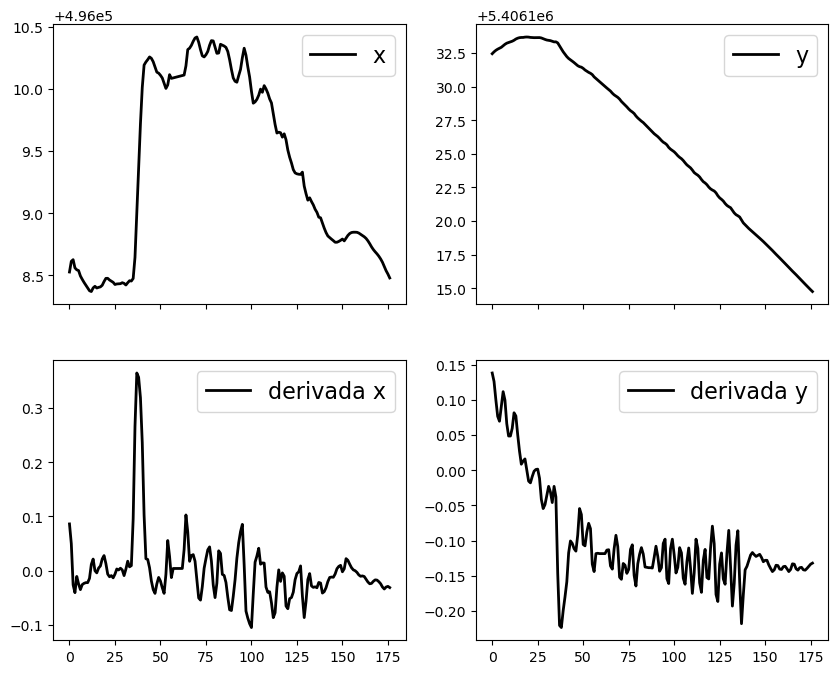

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
pedestrians_in_traffic = fetch_ucirepo(id=536)
# data (as pandas dataframes)
X = pedestrians_in_traffic.data.features
y = pedestrians_in_traffic.data.targets

pos_x = X[X['oid'] == 19339]['x'].to_numpy()
pos_y = X[X['oid'] == 19339]['y'].to_numpy()

times = np.arange(0, len(pos_x))

derivada_x = np.gradient(pos_x)
derivada_y = np.gradient(pos_y)

fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True)
axs[0,0].plot(times, pos_x, c='k', lw=2, label='x')
axs[0,0].legend(fontsize=16)
axs[0,1].plot(times, pos_y, c='k', lw=2, label='y')
axs[0,1].legend(fontsize=16)
axs[1,0].plot(times, derivada_x, c='k', lw=2, label='derivada x')
axs[1,0].legend(fontsize=16)
axs[1,1].plot(times, derivada_y, c='k', lw=2, label='derivada y')
axs[1,1].legend(fontsize=16)
plt.show()

Calculen las derivadas con SG y comparen. Para obtener estimaciones más suaves, pueden considerar ventanas más grandes que las usadas previamente, y orden del polinomio más bajo.

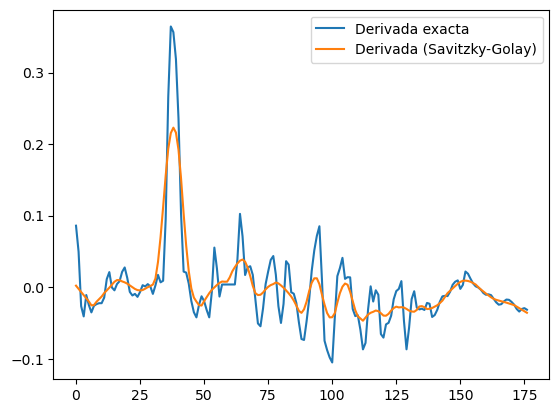

In [32]:
t = times.copy() 
dx = derivada_savgol(pos_x, dt=t[1]-t[0], window_length=11, polyorder=2)
plt.plot(t, derivada_x, label="Derivada exacta")
plt.plot(t, dx, label="Derivada (Savitzky-Golay)")
plt.legend()
plt.show()

# Interpolación

La [interpolación](https://en.wikipedia.org/wiki/Interpolation) es un caso particular de ajuste en el que se asume que los datos son exactos. El modelo debe pasar exactamente por los puntos conocidos y permite estimar valores intermedios. Ejemplo: interpolación polinómica o por splines.

## Interpolación polinómica

Consiste en encontrar un polinomio que pase exactamente por todos los puntos conocidos.
Es simple de implementar pero puede presentar oscilaciones si el número de puntos es grande (fenómeno de Runge).
Métodos numéricos clásicos: Lagrange, Newton, Vandermonde.

## Splines

Interpolan los datos mediante funciones polinómicas por tramos, garantizando continuidad y suavidad entre segmentos.
Evitan las oscilaciones de los polinomios globales y se usan frecuentemente para graficar o reconstruir trayectorias suaves.

In [22]:
from scipy.interpolate import UnivariateSpline

Veamos como puede servir para suav

### Ejemplo

Resolvamos el ejercicio de **Switch bioquimico**

$ \frac{dx}{d\tau} = s - rx + \frac{x^{2}}{1+x^{2}} $

donde r > 0 y s ≥ 0 son adimensionales.


In [23]:
from scipy.interpolate import UnivariateSpline, griddata
from mpl_toolkits.mplot3d import Axes3D  # Necesario para proyección 3D

# %% Diagrama de bifurcaciones (cúspide teórica)
x = np.linspace(0, 1, 1000)
r_sn = 2 * x / (1 + x**2)**2
s_sn = x**2 * (1 - x**2) / (1 + x**2)**2

plt.figure()
plt.plot(r_sn, s_sn, 'k')
plt.xlabel("r")
plt.ylabel("s")
plt.title("Curva de bifurcación (cúspide)")
plt.show()

# %% Campo vectorial y raíces (puntos fijos)
def f(x, r, s):
    return s - r * x + x**2 / (1 + x**2)

def raices(r, s):
    xx = np.linspace(0, 10, 2000)
    spline = UnivariateSpline(xx, f(xx, r, s), s=0, k=3)
    roots = spline.roots()
    # Incluimos x=0 si es raíz exacta
    if np.isclose(f(0, r, s), 0):
        roots = np.concatenate(([0], roots))
    return roots

# %% Barrido de parámetros
rs = np.linspace(0, 0.65, 80)
ss = np.linspace(0, 0.13, 80)

pfs = []
for r in rs:
    for s in ss:
        for x_star in raices(r, s):
            pfs.append([r, s, x_star])

pfs = np.array(pfs)

# %% Gráfico 3D de los puntos fijos
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(pfs[:, 0], pfs[:, 1], pfs[:, 2], '.', ms=1, alpha=0.5, label='Puntos fijos')
ax.plot(r_sn, s_cebras")
ax.set_ylabel("s")
ax.set_zlabel(r"$x^*$")
ax.view_init(30, 20)
ax.legend()
plt.title("Superficie de bifurcaciones del switch bioquímico")
plt.show()


SyntaxError: unterminated string literal (detected at line 45) (3722529590.py, line 45)

In [ ]:
#Un plot interactivo para variar el angulo
from ipywidgets import interact

def graf(angulo):
  fig = plt.figure(figsize=(6,6))
  ax = plt.axes(projection='3d')
  ax.plot(pfs[:,0], pfs[:,1], pfs[:,2], '.', ms=0.5)
  ax.plot(r_sn, s_sn, np.zeros(len(s_sn)), 'k')
  ax.set_zlim([0, 2])
  ax.grid(False)
  plt.axis('off')
  ax.view_init(30, angulo)
  plt.show()

interact(graf, angulo=(0,360,1.))

GIF

In [ ]:
#Paso 1: guardar las imagenes

save_folder = "/content/"  #Carpeta donde guardar las imagenes

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pfs[:,0], pfs[:,1], pfs[:,2], '.', ms=0.5)
ax.plot(r_sn, s_sn, np.zeros(len(s_sn)), 'k')
ax.set_zlim([0, 0.7])
ax.grid(False)
plt.axis('off')
# rotate the axes and update
contador = 0
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.savefig(save_folder+str(contador)+".png", dpi=100)   #Descomentar si queres guardar
    # plt.pause(.0005)
    contador+=1
plt.show()

In [ ]:
#Guardamos los nombres de los archivos, ordenados, en una lista
lista_files=[]
for k in range(360):
    lista_files.append(save_folder+str(k)+".png")

#%%
import imageio
images = []

for filename in lista_files:
    images.append(imageio.imread(filename))
# imageio.mimsave(save_folder+'movie.gif', images)